<a href="https://colab.research.google.com/github/rbarkerclarke/MaskMimicMaintain/blob/main/ReadBacteria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## File for reading interactome dataset and converting to payoff matrices

The extent to which interacting pairs influenced each other’s growth also varied quantitatively across strain and carbon environments. For example, in a parasitism, the facilitated strain may have increased in yield more than the inhibited strain decreased or vice versa. To capture these quantitative differences, we measured the magnitude m (strength) and angle Ө (type) of each bidirectional interaction in polar coordinates (Fig. 1F). Ө represented the relative effect of cocultured strains on each other (with Ө = −90° indicating that both strains inhibited each other equally, Ө = 0° indicating a balanced parasitism with equal and opposite effects, and Ө = 90° indicating that both strains facilitated each other equally; no Ө is assigned to neutralisms).

Theta and m coordinate system?


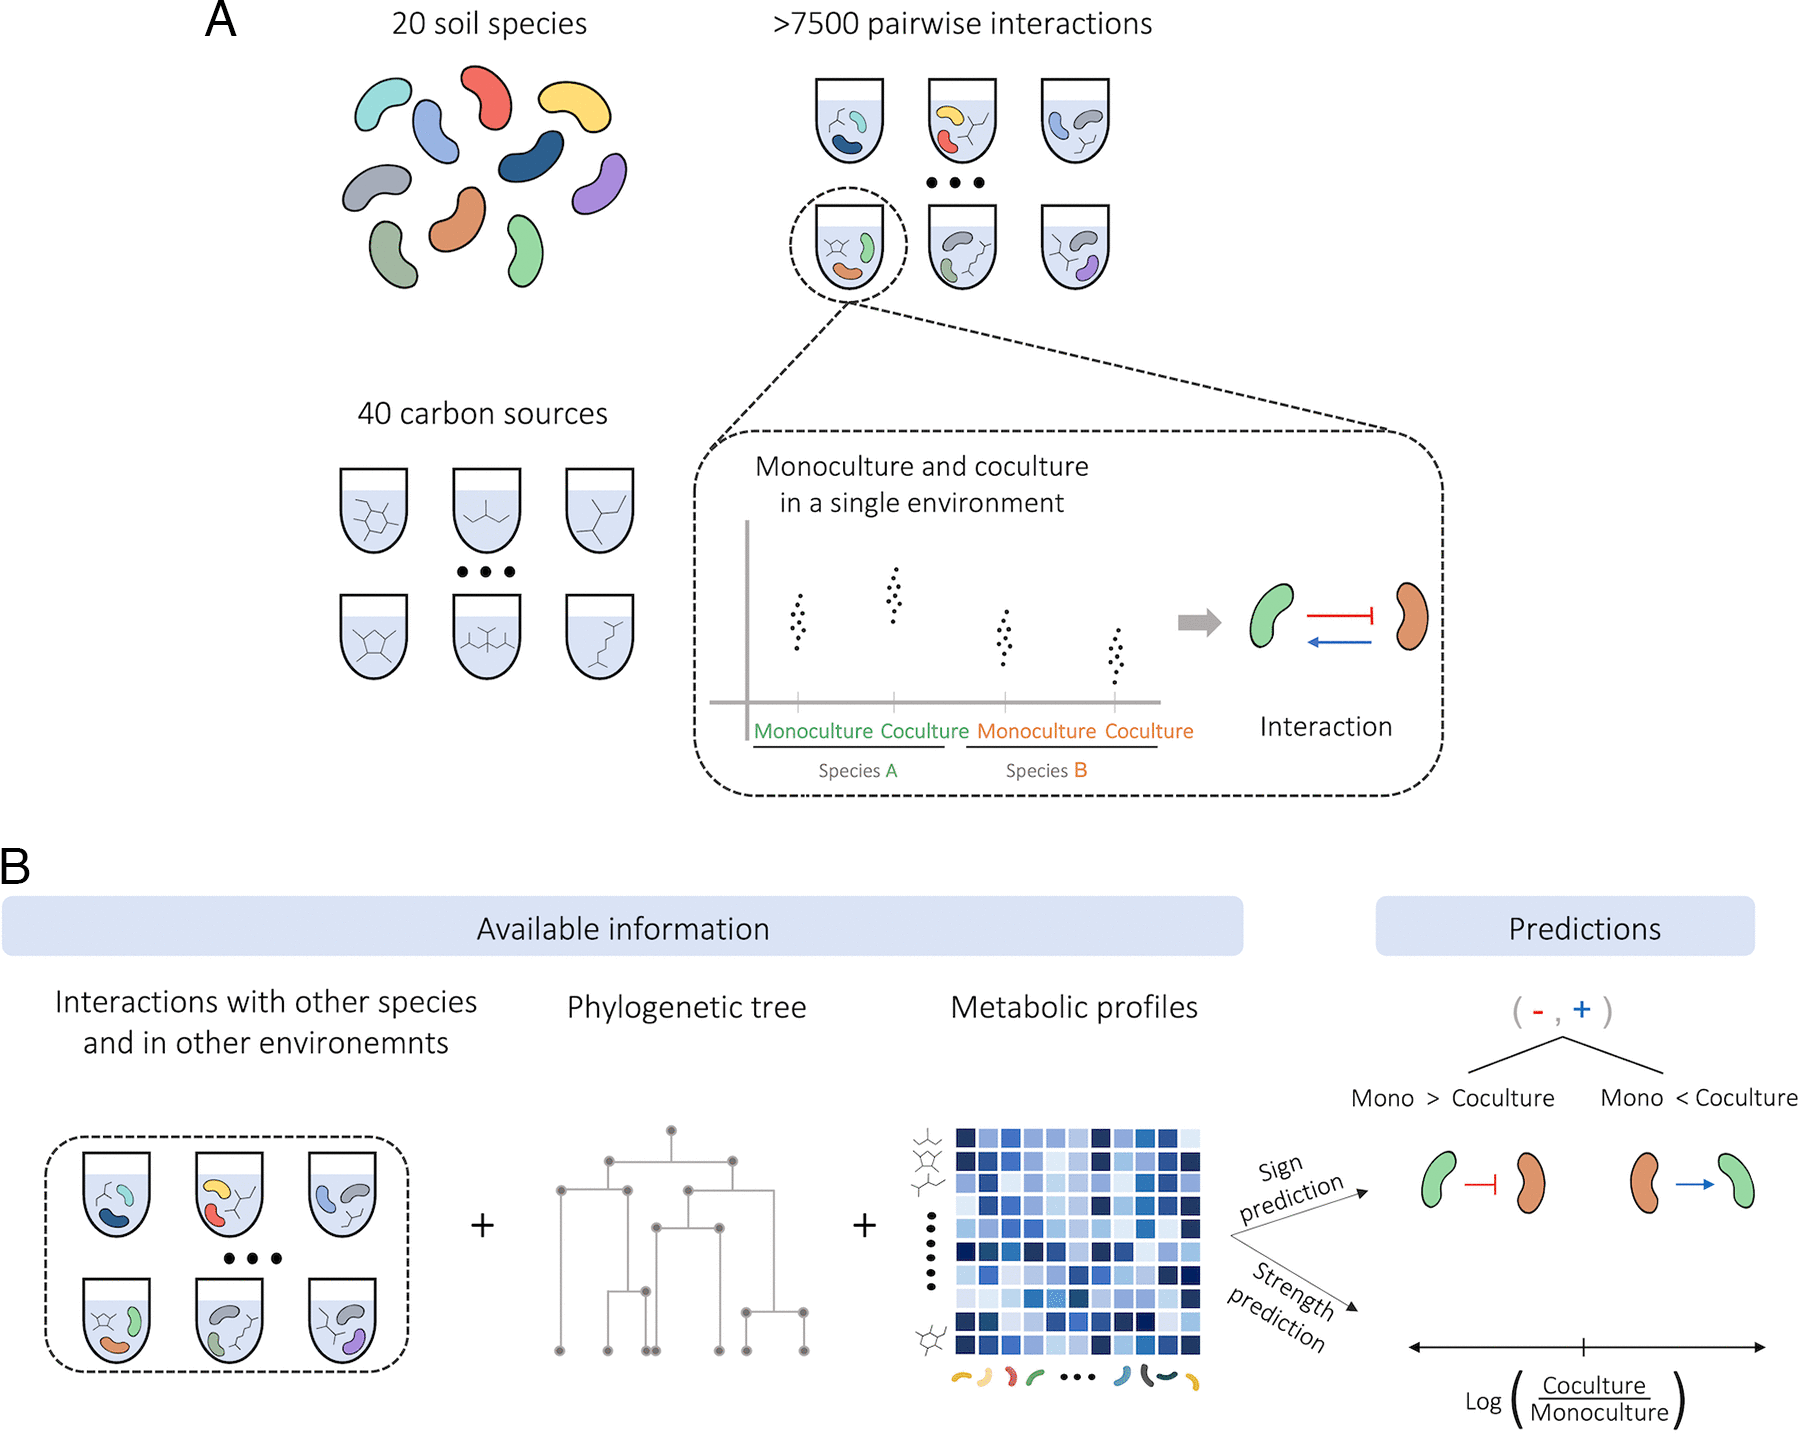

Dataset - kChip, an ultrahigh-throughput coculture platform, to measure 180,408 interactions among 20 soil bacteria across 40 carbon environments. 20x20 in 40 environments.



In [3]:
#Read kchip bacteria
import pandas as pd
df_2way = pd.read_csv('Features_two_way.csv')

In [4]:
df_2way.head()

,Unnamed: 0,Bug 1,Bug 2,Carbon,1 on 2: Effect,2 on 1: Effect,monoGrow_x,metDis,monoGrow_y,monoGrow24_x,monoGrow24_y,carbon_component_0,carbon_component_1,carbon_component_2,carbon_component_3,phy_strain_component_0_x,phy_strain_component_1_x,phy_strain_component_0_y,phy_strain_component_1_y
0,0,PAl,PAl,ArabinoseD,0.000000,0.000000,-1.021105,0.0,-1.021105,-0.826593,-0.826593,-4.301051,-1.204287,-0.195598,0.111448,-0.564351,-0.250667,-0.564351,-0.250667
1,1,PAl,PAl,ArabinoseL,-0.859252,-0.859252,1.368083,0.0,1.368083,1.208545,1.208545,4.408011,-0.090793,3.648330,0.330654,-0.564351,-0.250667,-0.564351,-0.250667
2,2,PAl,PAl,Xylose,-1.022604,-1.022604,1.457924,0.0,1.457924,-0.158047,-0.158047,2.992919,-3.119403,1.201452,-1.309462,-0.564351,-0.250667,-0.564351,-0.250667
3,3,PAl,PAl,Ribose,0.000000,0.000000,0.119638,0.0,0.119638,0.544417,0.544417,3.098714,-1.888247,-0.571456,-1.821310,-0.564351,-0.250667,-0.564351,-0.250667
4,4,PAl,PAl,Rhamnose,0.000000,0.000000,-0.809756,0.0,-0.809756,-0.218261,-0.218261,0.363870,-2.500142,-1.876414,-0.357683,-0.564351,-0.250667,-0.564351,-0.250667


In [5]:
df_2way['Carbon'].unique()

array(['ArabinoseD', 'ArabinoseL', 'Xylose', 'Ribose', 'Rhamnose',
       'Fructose', 'Galactose', 'Glucose', 'Glucose01', 'Mannose',
       'GlcNAc', 'Acetate', 'Pyruvate', 'Pyruvate01', 'Fumarate',
       'Succinate', 'Citrate', 'Glycerol', 'Glycerol01', 'Mannitol',
       'Sorbitol', 'Alanine', 'Serine', 'Proline', 'Proline01',
       'Glutamine', 'Isoleucine', 'Arginine', 'Trehalose', 'Cellobiose',
       'Maltose', 'Sucrose', 'Sucrose01', 'Lactose', 'Raffinose',
       'Melezitose', 'Arabinogalactan', 'Uridine', 'Mix', 'Water'],
      dtype=object)

In [6]:
df_2way['Bug 1'].unique()

array(['PAl', 'PAg2', 'PAg1', 'PAg3', 'LA', 'EL', 'RP2', 'RP1', 'SF1',
       'BI', 'KA', 'CF', 'EC', 'EA', 'PK', 'PR1', 'PAr', 'PR2', 'PH',
       'PP'], dtype=object)

Text(0, 0.5, 'C-A')

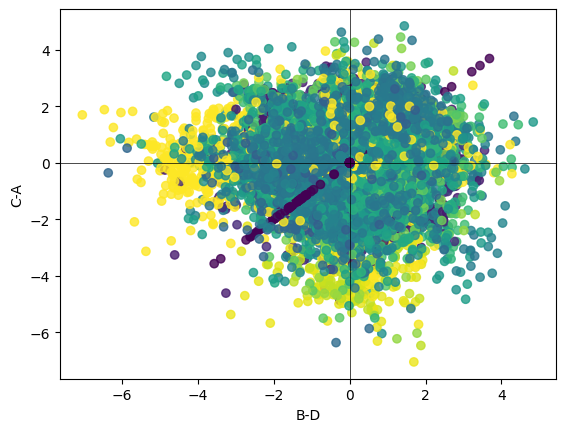

In [9]:
import matplotlib.pyplot as plt

# ALL

A = df_2way['monoGrow_x']
D = df_2way['monoGrow_y']
B = df_2way['monoGrow_x'] + df_2way['2 on 1: Effect']
C = df_2way['monoGrow_y'] + df_2way['1 on 2: Effect']

same = df_2way['Bug 1']==df_2way['Bug 2']

s = D-A
alpha = df_2way['2 on 1: Effect']
beta = df_2way['1 on 2: Effect']

plt.scatter(B-D,C-A, c=df_2way['metDis'], alpha=0.8)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.xlabel('B-D')
plt.ylabel('C-A')


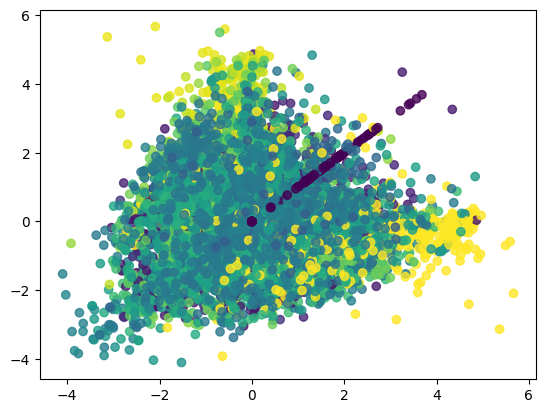

In [ ]:
plt.scatter(abs(alpha)-abs(s),abs(beta)-abs(s), c=df_2way['metDis'], alpha=0.8)
#plt.legend()

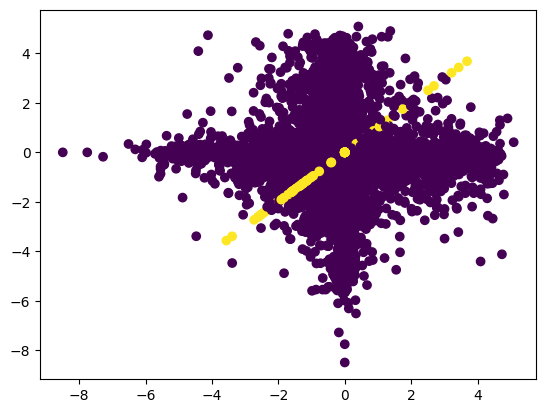

In [ ]:
plt.scatter(alpha,beta, c=same)

Text(0, 0.5, 'Bacteria 2 Monoculture')

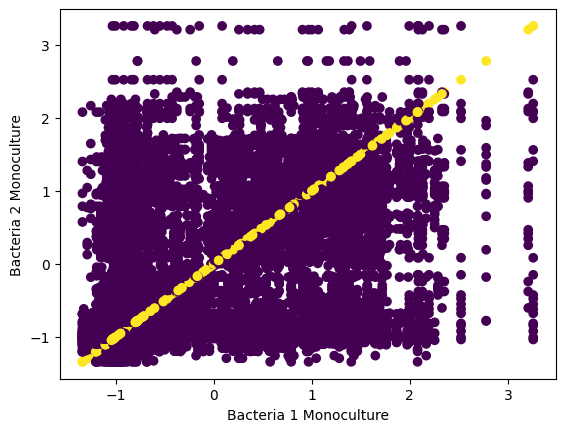

In [ ]:
plt.scatter(A,D, c=same)
plt.xlabel('Bacteria 1 Monoculture')
plt.ylabel('Bacteria 2 Monoculture')

(-100.0, 100.0)

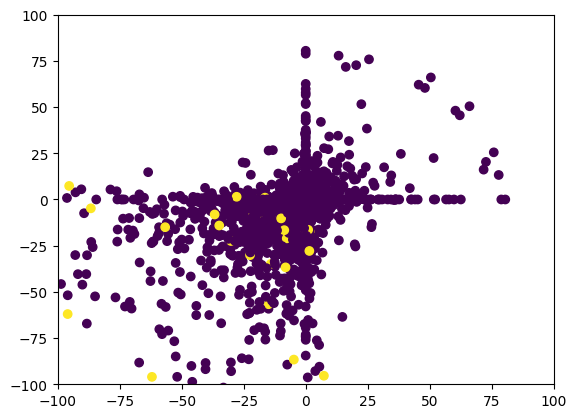

In [ ]:
plt.scatter(alpha/abs(s),beta/abs(s), c=df_2way['Carbon']=='Mannose')
plt.xlim(-100,100)
plt.ylim(-100,100)

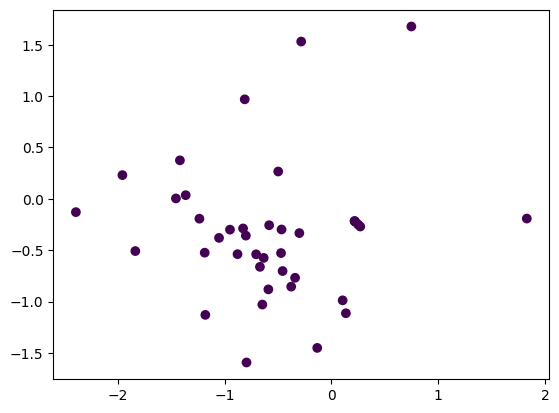

In [ ]:
# One pair only

bugs = ['PAl', 'PAg2', 'PAg1', 'PAg3', 'LA', 'EL', 'RP2', 'RP1', 'SF1',
       'BI', 'KA', 'CF', 'EC', 'EA', 'PK', 'PR1', 'PAr', 'PR2', 'PH',
       'PP']

df_2way_LA_EL = df_2way[df_2way['Bug 1'].isin(['LA']) & df_2way['Bug 2'].isin(['EL'])]
A = df_2way_LA_EL['monoGrow_x']
D = df_2way_LA_EL['monoGrow_y']
B = df_2way_LA_EL['monoGrow_x'] + df_2way_LA_EL['2 on 1: Effect']
C = df_2way_LA_EL['monoGrow_y'] + df_2way_LA_EL['1 on 2: Effect']

same = df_2way_LA_EL['Bug 1']==df_2way_LA_EL['Bug 2']

s = D-A
alpha = df_2way_LA_EL['2 on 1: Effect']
beta = df_2way_LA_EL['1 on 2: Effect']

plt.scatter(B-D,C-A, c=same)

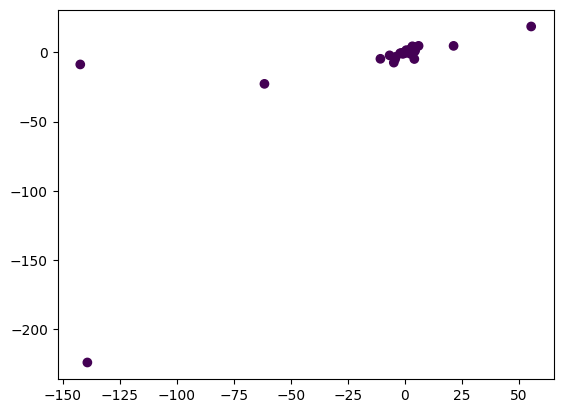

In [ ]:
plt.scatter(alpha/s,beta/s, c=same)

In [ ]:
df_2way_LA_EL.head()

,Unnamed: 0,Bug 1,Bug 2,Carbon,1 on 2: Effect,2 on 1: Effect,monoGrow_x,metDis,monoGrow_y,monoGrow24_x,monoGrow24_y,carbon_component_0,carbon_component_1,carbon_component_2,carbon_component_3,phy_strain_component_0_x,phy_strain_component_1_x,phy_strain_component_0_y,phy_strain_component_1_y
3893,4160,LA,EL,ArabinoseD,0.000000,0.000000,-1.102370,0.042081,-1.324591,-0.898841,-0.971300,-4.301051,-1.204287,-0.195598,0.111448,-0.771,0.077075,-0.734731,-0.044094
3894,4161,LA,EL,ArabinoseL,-0.301413,-0.815053,0.950274,0.042081,0.963518,1.475758,1.799778,4.408011,-0.090793,3.648330,0.330654,-0.771,0.077075,-0.734731,-0.044094
3895,4162,LA,EL,Xylose,-0.839493,-0.490678,0.891332,0.042081,1.766564,0.499687,0.610344,2.992919,-3.119403,1.201452,-1.309462,-0.771,0.077075,-0.734731,-0.044094
3896,4163,LA,EL,Ribose,-0.522924,-0.637705,1.279302,0.042081,1.443927,0.816904,1.462025,3.098714,-1.888247,-0.571456,-1.821310,-0.771,0.077075,-0.734731,-0.044094
3897,4164,LA,EL,Rhamnose,-0.267319,-0.616447,0.797794,0.042081,0.076630,-0.407904,-0.272703,0.363870,-2.500142,-1.876414,-0.357683,-0.771,0.077075,-0.734731,-0.044094
